# Getting Python


For this course, we are going to use Jupyter notebook as our environment for developing Python code.
refer to https://jupyter.readthedocs.io/en/latest/content-quickstart.html on the instructions how to install it, the easiest way is to install from Anaconda (https://www.anaconda.com/download/) website, make sure you install (Version 4.4.0, Release Date: May 31, 2017) with Python 3.6.

Also, it is good for the students who are not familiar with python (or they need a quick refreshment) to follow Jim Bagrow tutorial http://bagrow.com/ds1/whirlwindtourpython/00-Title.html. 

All the assignments to be written in Python 3.6 and can be run using Jupyter on one of the following Internet browsers (Chrome, Safari or Firefox), these are the browsers that officially supported by jupyter.

<u> Note: for this assignment, submit your local copy of this page, running on IPython. Submit the file to Blackboard under Assignment1 using this file format:</u> <b>Yourfirstname_lastname_Assignment2.ipynb</b> 

#### <b>Deadline</b>: <u>Friday, Oct-06-2017 11:59 PM.</u>


# Assignment 2 -- Part 1

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file Assignment2_data1.txt contains a training set of housing prices. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house. 

Note:  You can we easily extend linear regression code discussed in the lecture to handle multiple variables linear regression.



##### always import all needed libraries in the first cell

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd


### Part 1, Q1 -- 4%

Print out 8 random elemenets from the dataset.

In [2]:
np.random.seed(0)
df_house = pd.read_csv('data/Assignment2_data1.txt', delimiter= ",", header=None)
df_house.columns = ['Size', 'Bedroom_number', "Price"]

#print(df_house)
#df_house.info()
#df_house_norm.describe()

df_house.sample(8)

,Size,Bedroom_number,Price
28,2200,3,475000
33,3137,3,579900
30,1839,2,349900
4,3000,4,539900
18,2609,4,499998
11,2000,3,347000
42,2567,4,314000
31,1000,1,169900


### Part 1, Q2 -- 4%

Notice that the scale of the values for each variable is vastly different. You might need to adjust the scale of the features. Normalize the data by subtracting from each value in a feature the mean of that feature, and then dividing by the standard deviation. Print out 8 random elemenets from the dataset.

In [3]:
np.random.seed(0)
#mean normalization function
def feature_normalize(df):
    df_norm = (df - df.mean()) / df.std()
    return df_norm

#variable initialization
cols_house = df_house.shape[1]
X_house = df_house.iloc[:,0:cols_house-1] 
y_house = df_house.iloc[:,cols_house-1:cols_house]
X_house = feature_normalize(X_house)

#add the column of ones in the features
X_house.insert(0, 'Ones', 1)
#print(df_house_norm)
#df_house_norm.info()
#df_house_norm.describe()

X_house.sample(8)


,Ones,Size,Bedroom_number
28,1,0.250810,-0.223675
33,1,1.429868,-0.223675
30,1,-0.203448,-1.537767
4,1,1.257476,1.090417
18,1,0.765468,1.090417
11,1,-0.000857,-0.223675
42,1,0.712618,1.090417
31,1,-1.259189,-2.851859


### Part 1, Q3  -- 6%
Implement cost function (calcLinearRegressionMultiCost) and gradient descent (LinearRegressionMultiGradientDescent). The only difference from one variable linear regression is that there is one more feature. The hypothesis function and the batch gradient descent update rule remain unchanged. test the functions to make sure they are working fine.

In [4]:
#vectorization
X_house = np.matrix(X_house.values)
y_house = np.matrix(y_house.values)
theta_house = np.matrix(np.array([0,0,0]))
print(X_house.shape, y_house.shape, theta_house.shape)

#creat the cost function for multivariate linear regression
def calcLinearRegressionMultiCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

print(calcLinearRegressionMultiCost(X_house, y_house, theta_house))

#gradient decent function for multivariate linear regression
def LinearRegressionMultiGradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape)) 
    parameters = theta.ravel().shape[1]
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = calcLinearRegressionMultiCost(X, y, theta)
    return theta, cost



(47, 3) (47, 1) (1, 3)
65591548106.5


### Part 1, Q4  -- 12%

Run the gradient descent algorithm implemented in Part1-Q3 to fit your parameters theta to the training set. Report optimal final θ. Plot the cost with the number of iterations.

[[ 340412.65957447  110631.05027885   -6649.47427082]]
2043280050.6


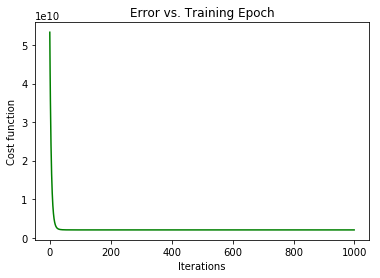

In [5]:
alpha_house = 0.1
iters_house = 1000


theta_house_optimal, cost_house = LinearRegressionMultiGradientDescent(X_house, y_house, theta_house, alpha_house, iters_house)
print(theta_house_optimal)
print(calcLinearRegressionMultiCost(X_house, y_house, theta_house_optimal))


plt.plot(np.arange(iters_house), cost_house, 'g')
plt.xlabel('Iterations')
plt.ylabel('Cost function')
plt.title('Error vs. Training Epoch')
plt.show()

### Part 1, Q5   -- 4%

what is the price of house of 2100 square feet and 4 bed rooms ?

In [6]:
def predict_norm(a, b, df, index_1, index_2):
    index_1_mean = df[index_1].mean()
    index_1_std = df[index_1].std()
    index_2_mean = df[index_2].mean()
    index_2_std = df[index_2].std()
    x1 = (a - index_1_mean) / index_1_std
    x2 = (b - index_2_mean) / index_2_std
    return(np.array([1.0, x1, x2]))

price = predict_norm(2100, 4, df_house, 'Size', 'Bedroom_number').dot(theta_house_optimal.T)
print("The price of house of 2100 square feet and 4 bedrooms is\n", price[0,0])


The price of house of 2100 square feet and 4 bedrooms is
 346988.24853


# Assignment 2 -- Part 2

In this exercise, you will implement logistic regression and apply it to dataset Assignment2_data2.txt

Import and examine the dataset Assignment2_data2.txt. There are two continuous independent variables in the data - “Exam 1” and “Exam 2”. Our prediction target is the “Admitted” label, which is binary-valued. A value of 1 means the student was admitted and a value of 0 means the student was not admitted.

In this part of the Assignment, you will build a logistic regression model to predict whether a student gets admitted into a university (a model that estimates an applicant’s probability of admission based the scores from those two exams)


### Part 2, Q1  -- 6%
Visualize the data. X-axis for Exam 1 score, Y-axis for Exam 2 score, + (plus) for admitted, and circle for not admitted. 

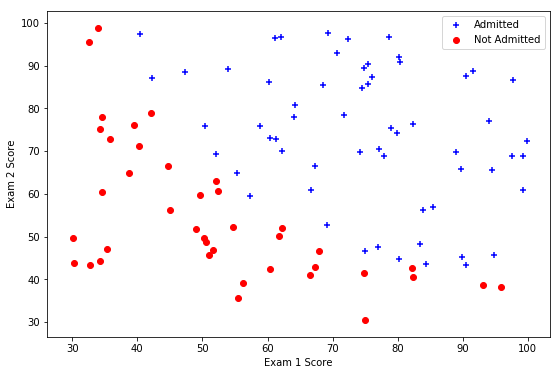

In [7]:
#import seaborn as sns
df_exam = pd.read_csv('data/Assignment2_data2.txt', delimiter= ',', header=None )
df_exam.columns = ['Exam1_score', 'Exam2_score', 'admitted or not']

##other way to plot
#df_exam_show = df_exam.replace([0, 1], ['not admitted', 'admitted']) 
#sns.pairplot(x_vars=['Exam1_score'], y_vars=['Exam2_score'], data=df_exam_show, hue='admitted or not',markers=['o', '+'], size=10)

ad = df_exam[df_exam['admitted or not'].isin([1])]  
no_ad = df_exam[df_exam['admitted or not'].isin([0])]

#visualize the data
fig, ax = plt.subplots(figsize=(9,6))  
ax.scatter(ad['Exam1_score'], ad['Exam2_score'], c='b', marker='+', label='Admitted')  
ax.scatter(no_ad['Exam1_score'], no_ad['Exam2_score'], c='r', marker='o', label='Not Admitted')  
ax.legend()  
ax.set_xlabel('Exam 1 Score')  
ax.set_ylabel('Exam 2 Score') 
plt.show()



### Part 2, Q2  -- 6%

Before you start with the implementation of the cost function and gradient descent algorithm for logistic Regression implement the sigmoid function "sigmoid"  that can be called by the rest of your program. test it when you are finished, try testing a few values by calling sigmoid(x). For large positive values of x, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. Evaluating sigmoid(0) should give you exactly 0.5.

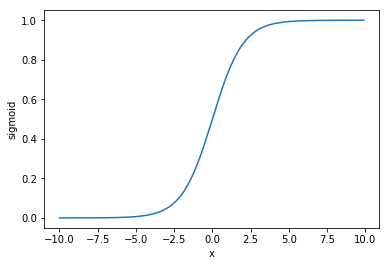

In [8]:
def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y

#testing
x_example = np.arange(-10, 10, step=0.1)
plt.plot(x_example, sigmoid(x_example))
plt.xlabel('x')
plt.ylabel('sigmoid')
plt.show()

### Part 2, Q2   -- 18%

Implement cost function (calcLogRegressionCost) and gradient descent (logRegressionGradientDescent).   Once you are done,  call your "calcLogRegressionCost" using the initial parameters of θ. You should see that the cost is about 0.693.

In [9]:
# set X (training data) and y (target variable)
cols_exam = df_exam.shape[1]
X_exam = df_exam.iloc[:,0:cols_exam-1] 
X_exam = feature_normalize(X_exam)
X_exam.insert(0, 'Ones', 1)
#print(X_exam)
y_exam = df_exam.iloc[:,cols_exam-1:cols_exam]

#vectorization
X_exam = np.matrix(X_exam.values)
y_exam = np.matrix(y_exam.values)
theta_exam = np.matrix(np.array([0,0,0]))
print(X_exam.shape, y_exam.shape, theta_exam.shape)

#cost function for logistic regression
def calcLogRegressionCost(X, y, theta):  
    inner_1 = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    inner_2 = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(inner_1 - inner_2) / (len(X))

print(calcLogRegressionCost(X_exam, y_exam, theta_exam))

#gradient decent function for logistic regression
def logRegressionGradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape)) 
    parameters = theta.ravel().shape[1]
    cost = np.zeros(iters) 
    
    for i in range(iters):
        error = sigmoid(X * theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = calcLogRegressionCost(X, y, theta)
    return theta, cost


(100, 3) (100, 1) (1, 3)
0.69314718056


### Part 2, Q3   -- 14%

Run the gradient descent algorithm to fit your parameters theta to the training set. Report optimal final θ. Plot the decision boundary with the training data

The optimal final theta is: 
 [[ 1.71662145  4.0089758   3.74010348]]


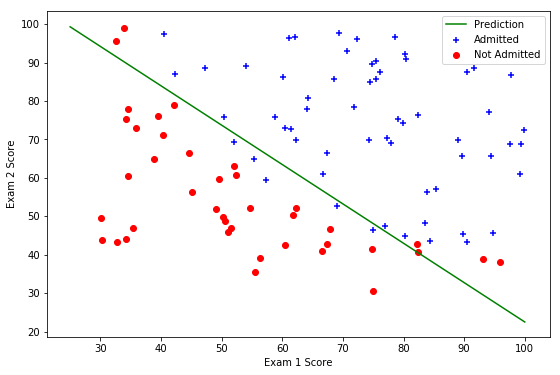

In [10]:
#find optimal theta
alpha_exam = 1
iters_exam = 1000


theta_exam_optimal, cost_exam = logRegressionGradientDescent(X_exam, y_exam, theta_exam, alpha_exam, iters_exam)
print("The optimal final theta is: \n", theta_exam_optimal)
#print(calcLogRegressionCost(X_exam, y_exam, theta_exam_optimal))

#decision boundary
theta_optimal = np.array(theta_exam_optimal)
x_1 = np.linspace(25, 100, 100)
x_norm = (x_1 - df_exam['Exam1_score'].mean()) / df_exam['Exam1_score'].std()
y_norm = -(theta_exam_optimal[0,0] + theta_exam_optimal[0,1] * x_norm) / theta_exam_optimal[0,2]
y_1 = y_norm * df_exam['Exam2_score'].std()+ df_exam['Exam2_score'].mean()


#plot 
fig, ax = plt.subplots(figsize=(9,6)) 
ax.plot(x_1, y_1, 'g', label='Prediction')
ax.scatter(ad['Exam1_score'], ad['Exam2_score'], c='b', marker='+', label='Admitted')  
ax.scatter(no_ad['Exam1_score'], no_ad['Exam2_score'], c='r', marker='o', label='Not Admitted')  
ax.legend()  
ax.set_xlabel('Exam 1 Score')  
ax.set_ylabel('Exam 2 Score') 
plt.show(fig)




# Part 2, Q4  -- 4%

If a student has an Exam 1 score 100 and an Exam 2 score 50, what is the admission probability of this student? 

In [11]:
admission_example = predict_norm(100, 50, df_exam, 'Exam1_score', 'Exam2_score' ).dot(theta_exam_optimal.T)
prob_admission = sigmoid(admission_example[0,0])
print("The admission probability of a student has Exam1 = 100 and Exam2 = 50 is\n", prob_admission)


The admission probability of a student has Exam1 = 100 and Exam2 = 50 is
 0.996049573758


### Part 2, Q5 -- 8% <u> this question only for Graduate stundents 
Plot the cost with the number of iterations. what is the best learning rate you choosed and why ?

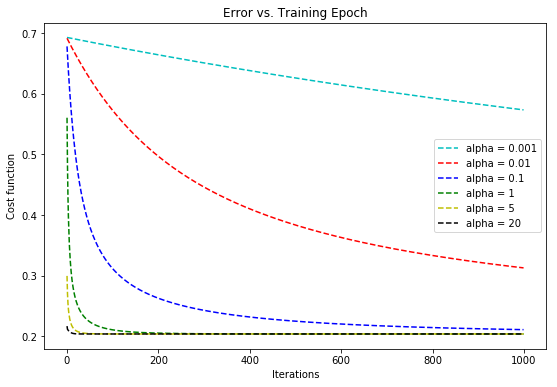

The cost value for alpha=0.001 is 0.573433142145
The cost value for alpha=0.01  is 0.312607154775
The cost value for alpha=0.1   is 0.210636591617
The cost value for alpha=1     is 0.203497796906
The cost value for alpha=5     is 0.203497701589
The cost value for alpha=20    is 0.203497701589


In [12]:
#alpha = 0.001
alpha_1 = 0.001  
theta_1, cost_1 = logRegressionGradientDescent(X_exam, y_exam, theta_exam, alpha_1, iters_exam)
cost_value_1 = calcLogRegressionCost(X_exam, y_exam, theta_1)

#alpha = 0.01
alpha_2 = 0.01
theta_2, cost_2 = logRegressionGradientDescent(X_exam, y_exam, theta_exam, alpha_2, iters_exam)
cost_value_2 = calcLogRegressionCost(X_exam, y_exam, theta_2)

#alpha = 0.1
alpha_3 = 0.1
theta_3, cost_3 = logRegressionGradientDescent(X_exam, y_exam, theta_exam, alpha_3, iters_exam)
cost_value_3 = calcLogRegressionCost(X_exam, y_exam, theta_3)

#alpha = 1
alpha_4 = 1
theta_4, cost_4 = logRegressionGradientDescent(X_exam, y_exam, theta_exam, alpha_4, iters_exam)
cost_value_4 = calcLogRegressionCost(X_exam, y_exam, theta_4)

#alpha = 5
alpha_5 = 5
theta_5, cost_5 = logRegressionGradientDescent(X_exam, y_exam, theta_exam, alpha_5, iters_exam)
cost_value_5 = calcLogRegressionCost(X_exam, y_exam, theta_5)

#alpha = 20
alpha_6 = 20
theta_6, cost_6 = logRegressionGradientDescent(X_exam, y_exam, theta_exam, alpha_6, iters_exam)
cost_value_6 = calcLogRegressionCost(X_exam, y_exam, theta_6)

#plot 
fig, ax = plt.subplots(figsize=(9,6)) 
ax.plot(np.arange(iters_exam), cost_1, 'c--', label='alpha = 0.001')
ax.plot(np.arange(iters_exam), cost_2, 'r--', label='alpha = 0.01')
ax.plot(np.arange(iters_exam), cost_3, 'b--', label='alpha = 0.1')
ax.plot(np.arange(iters_exam), cost_4, 'g--', label='alpha = 1')
ax.plot(np.arange(iters_exam), cost_5, 'y--', label='alpha = 5')
ax.plot(np.arange(iters_exam), cost_6, 'k--', label='alpha = 20')
ax.legend()
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost function')
ax.set_title('Error vs. Training Epoch')
plt.show()

print("The cost value for alpha=0.001 is", cost_value_1)
print("The cost value for alpha=0.01  is", cost_value_2)
print("The cost value for alpha=0.1   is", cost_value_3)
print("The cost value for alpha=1     is", cost_value_4)
print("The cost value for alpha=5     is", cost_value_5)
print("The cost value for alpha=20    is", cost_value_5)

In the figure, the cost function decreases very slowly when $\alpha = 0.001$, which mean it's slow to converge during gradient descent. As the alpha increases, the speed of convergence increases. According to the cost value, the values for $\alpha = 1/5/20$ are same, which means the speed converge will not increase effectively after a center value of alpha. Thus, in this case, $\alpha = 1$ is a better choice because it low enough to converges something useful and fast enough to get an appropriate speed of convergence.




# Assignment 2 -- Part 3

In this part of the assignment, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance(QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.

Import and examine the dataset Assignment2_data3.txt. Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. 

### Part 3, Q1 -- 4%
Visualize the data. X-axis for Test 1 score, Y-axis for Test 2 score, + (plus) for accepted, and circle for rejected. 

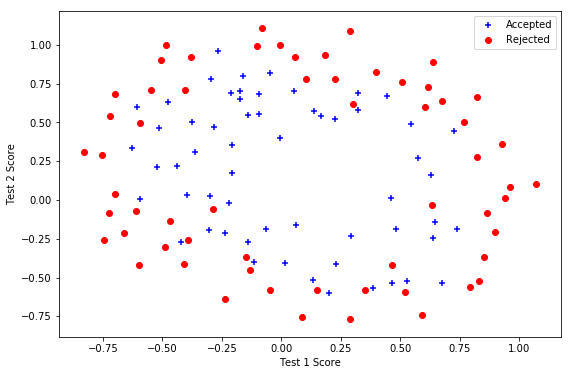

In [13]:
df_QA = pd.read_csv('data/Assignment2_data3.txt', delimiter= ",", header=None )
df_QA.columns = ["Test1_score", "Test2_score", "accepted or rejected"]

ac = df_QA[df_QA['accepted or rejected'].isin([1])]  
re = df_QA[df_QA['accepted or rejected'].isin([0])]

#visualize the data
fig, ax = plt.subplots(figsize=(9,6)) 
ax.scatter(ac['Test1_score'], ac['Test2_score'], c='b', marker='+', label='Accepted')  
ax.scatter(re['Test1_score'], re['Test2_score'], c='r', marker='o', label='Rejected')  
ax.legend()  
ax.set_xlabel('Test 1 Score')  
ax.set_ylabel('Test 2 Score') 
plt.show(fig)

### Part 3, Q2 -- 18%
One way to fit the data better is to create more features from each data
point.  map the features into all polynomial terms of x1 and x2 up to the sixth power.  

<img src="img/polyn6.png" width = 300>

<br> Report optimal final θ. Plot the decision boundary with the training data. 
You can use the cost and GradientDescent algorithms implemented in assignment Part2.

The optimal final theta is: 
 [[  3.20315316   0.07854832   4.52156805  -4.94068991  -9.3673617
    2.33802961   6.06747152   9.93023475  14.6704702   -4.17028001
    3.9878056    3.022815   -13.4138887    0.48171095 -24.48851427
   -2.41042214  -5.79126795  14.41031717 -10.56990806 -18.91458392
   13.49654386 -22.58289292 -11.30073876  -3.33423556  15.63187905
  -23.3183825  -16.66837308   0.71515074]]


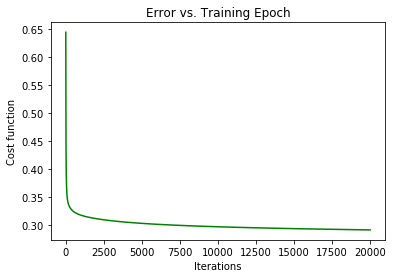

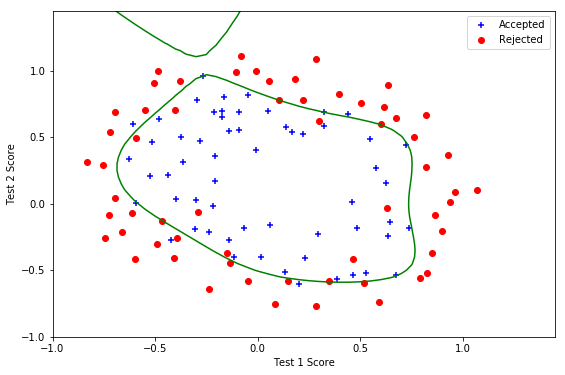

In [14]:
# set X (training data) and y (target variable)
cols_QA = df_QA.shape[1]
X_QA = df_QA.iloc[:,0:cols_QA-1]
y_QA = df_QA.iloc[:,cols_QA-1:cols_QA]

#add polynomial columns in X
x1 = X_QA['Test1_score']  
x2 = X_QA['Test2_score']

def add_col(x1, x2, degree, df):
    for m in range(2, degree + 1):
        for i in range(0, m + 1):
            j = m-i
            df['P' + str(j) + str(i)] = np.power(x1, j) * np.power(x2, i)
    return(df)

X_QA_1 = add_col(x1, x2, 6, X_QA)
#X_QA_1 = feature_normalize(X_QA_1)
X_QA_1.insert(0, 'Ones', 1)
#print(X_QA_1)

#vectorization
X_QA_1 = np.matrix(X_QA_1.values)
y_QA_1 = np.matrix(y_QA.values)
theta_QA_1 = np.matrix(np.zeros(28))
#print(X_QA_1.shape, y_QA_1.shape, theta_QA_1.shape)


#find optimal theta
alpha_QA = 7
iters_QA = 20000


theta_QA_optimal, cost_QA = logRegressionGradientDescent(X_QA_1, y_QA_1, theta_QA_1, alpha_QA, iters_QA)
print("The optimal final theta is: \n", theta_QA_optimal)
#print(calcLogRegressionCost(X_QA_1, y_QA, theta_QA_optimal))

#plot
plt.plot(np.arange(iters_QA), cost_QA, 'g')
plt.xlabel('Iterations')
plt.ylabel('Cost function')
plt.title('Error vs. Training Epoch')
plt.show()


#decision boundary
x = np.arange(-1, 1.5, 0.05)
y = np.arange(-1, 1.5, 0.05)
X, Y = np.meshgrid(x, y)

def poly_func(X, Y, k):
    F = k[0,0]+\
        k[0,1]*X+k[0,2]*Y+\
        k[0,3]*X*X+k[0,4]*X*Y+k[0,5]*Y*Y+\
        k[0,6]*X*X*X+k[0,7]*X*X*Y+k[0,8]*X*Y*Y+k[0,9]*Y*Y*Y+\
        k[0,10]*X*X*X*X+k[0,11]*X*X*X*Y+k[0,12]*X*X*Y*Y+k[0,13]*X*Y*Y*Y+k[0,14]*Y*Y*Y*Y+\
        k[0,15]*X*X*X*X*X+k[0,16]*X*X*X*X*Y+k[0,17]*X*X*X*Y*Y+k[0,18]*X*X*Y*Y*Y+k[0,19]*X*Y*Y*Y*Y+k[0,20]*Y*Y*Y*Y*Y+\
        k[0,21]*X*X*X*X*X*X+k[0,22]*X*X*X*X*X*Y+k[0,23]*X*X*X*X*Y*Y+k[0,24]*X*X*X*Y*Y*Y+k[0,25]*X*X*Y*Y*Y*Y+k[0,26]*X*Y*Y*Y*Y*Y+k[0,27]*Y*Y*Y*Y*Y*Y
    return F

F1 = poly_func(X, Y, theta_QA_optimal)
fig, ax = plt.subplots(figsize=(9,6)) 
plt.contour(X, Y, F1, [0], colors = 'g')
ax.scatter(ac['Test1_score'], ac['Test2_score'], c='b', marker='+', label='Accepted')  
ax.scatter(re['Test1_score'], re['Test2_score'], c='r', marker='o', label='Rejected')  
ax.legend()  
ax.set_xlabel('Test 1 Score')  
ax.set_ylabel('Test 2 Score') 
plt.show()



### Part 3, Q3 -- 12% <u> this part only fo Graduate stundents
Implement Regularized Logistic Regression cost function and gradient descent namely (calcRegularizedLogRegressionCost, RegularizedlogRegressionGradientDescent) . Plot the cost with the number of iterations.

[[ 1.27273951  0.6252718   1.18108869 -2.01996086 -0.91742375 -1.43166444
   0.12400635 -0.36553437 -0.35723962 -0.17513048 -1.45815646 -0.05098906
  -0.61555504 -0.27470631 -1.19281652 -0.24218823 -0.20600609 -0.04473075
  -0.2777845  -0.2953781  -0.45635749 -1.04320249  0.02777171 -0.29243131
   0.01556681 -0.32737959 -0.14388693 -0.92465257]]
0.535866568106


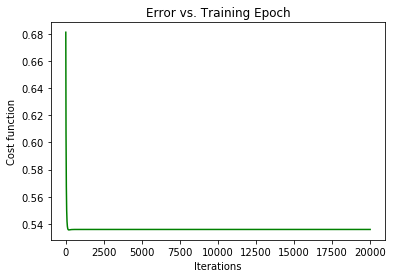

In [15]:
#cost function for regularized logistic regression
def calcRegularizedLogRegressionCost(X, y, theta, l):  
    inner_1 = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    inner_2 = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    inner_3 = (l/2) * (theta * theta.T)
    return (np.sum(inner_1 - inner_2)+ np.sum(inner_3)) / (len(X))

#print(calcRegularizedLogRegressionCost(X_QA_1, y_QA_1, theta_QA_1,1))

#gradient decent function for regularized logistic regression
def RegularizedlogRegressionGradientDescent(X, y, theta, alpha, iters, l):
    temp = np.matrix(np.zeros(theta.shape)) 
    parameters = theta.ravel().shape[1]
    cost = np.zeros(iters) 
    
    for i in range(iters):
        error = sigmoid(X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            if j == 0:
                temp[0,j] = theta[0,j] - (alpha / len(X)) * (np.sum(term))
            else:
                temp[0,j] = theta[0,j] - ((alpha / len(X)) * (np.sum(term) + l * theta[0,j]))
            
        theta = temp
        cost[i] = calcRegularizedLogRegressionCost(X, y, theta, l)
    return theta, cost

alpha_rQA = 1
iters_rQA = 20000
l_1 = 1

theta_1, cost_1 = RegularizedlogRegressionGradientDescent(X_QA_1, y_QA_1, theta_QA_1, alpha_rQA, iters_rQA, l_1)
print(theta_1)
#print(cost_1)
print(calcRegularizedLogRegressionCost(X_QA_1, y_QA, theta_1, l_1))

#plot
plt.plot(np.arange(iters_rQA), cost_1, 'g')
plt.xlabel('Iterations')
plt.ylabel('Cost function')
plt.title('Error vs. Training Epoch')
plt.show()


### Part 3, Q4 -- 12%, <u> this part only fo Graduate stundents
Demonstrate the impact of the regularization parameter λ with 1, 0, 100, 1000. Plot the decision boundary of for the 4 different λ values. 



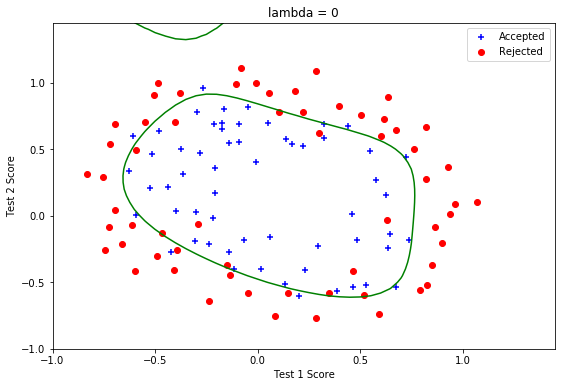

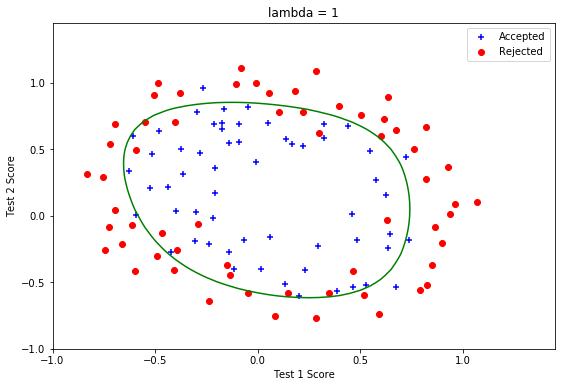

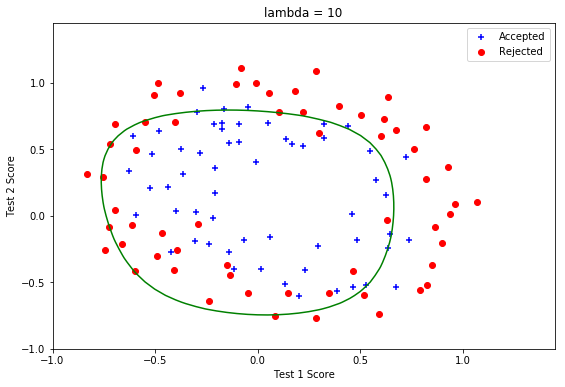

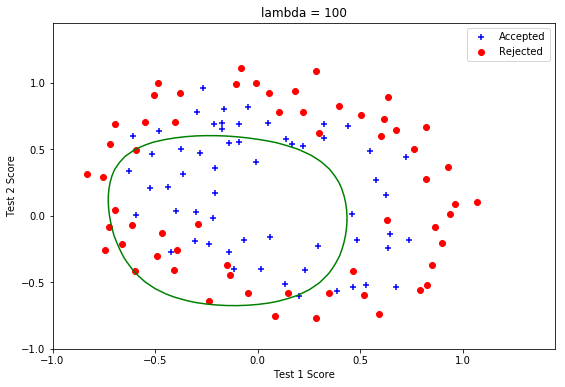

In [16]:
#lambda = 0 
#decision boundary
l_0 = 0
theta_0, cost_0 = RegularizedlogRegressionGradientDescent(X_QA_1, y_QA_1, theta_QA_1, alpha_rQA, iters_rQA, l_0)
#print(calcRegularizedLogRegressionCost(X_QA_1, y_QA, theta_rQA_optimal, l_0))

x = np.arange(-1, 1.5, 0.05)
y = np.arange(-1, 1.5, 0.05)
X, Y = np.meshgrid(x, y)

l0 = poly_func(X, Y, theta_0)
fig, ax = plt.subplots(figsize=(9,6)) 
plt.contour(X, Y, l0, [0], colors = 'g')
ax.scatter(ac['Test1_score'], ac['Test2_score'], c='b', marker='+', label='Accepted')  
ax.scatter(re['Test1_score'], re['Test2_score'], c='r', marker='o', label='Rejected')  
ax.legend()  
ax.set_xlabel('Test 1 Score')  
ax.set_ylabel('Test 2 Score') 
ax.set_title('lambda = 0')
plt.show()

#lambda = 1
#decision boundary
x = np.arange(-1, 1.5, 0.05)
y = np.arange(-1, 1.5, 0.05)
X, Y = np.meshgrid(x, y)

l1 = poly_func(X, Y, theta_1)
fig, ax = plt.subplots(figsize=(9,6)) 
plt.contour(X, Y, l1, [0], colors = 'g')
ax.scatter(ac['Test1_score'], ac['Test2_score'], c='b', marker='+', label='Accepted')  
ax.scatter(re['Test1_score'], re['Test2_score'], c='r', marker='o', label='Rejected')  
ax.legend()  
ax.set_xlabel('Test 1 Score')  
ax.set_ylabel('Test 2 Score') 
ax.set_title('lambda = 1')
plt.show()

#lambda = 10 
#decision boundary
l_10 = 10
theta_10, cost_10 = RegularizedlogRegressionGradientDescent(X_QA_1, y_QA_1, theta_QA_1, alpha_rQA, iters_rQA, l_10)
#print(calcRegularizedLogRegressionCost(X_QA_1, y_QA, theta_rQA_optimal, l_10))

x = np.arange(-1, 1.5, 0.05)
y = np.arange(-1, 1.5, 0.05)
X, Y = np.meshgrid(x, y)

l10 = poly_func(X, Y, theta_10)
fig, ax = plt.subplots(figsize=(9,6)) 
plt.contour(X, Y, l10, [0], colors = 'g')
ax.scatter(ac['Test1_score'], ac['Test2_score'], c='b', marker='+', label='Accepted')  
ax.scatter(re['Test1_score'], re['Test2_score'], c='r', marker='o', label='Rejected')  
ax.legend()  
ax.set_xlabel('Test 1 Score')  
ax.set_ylabel('Test 2 Score') 
ax.set_title('lambda = 10')
plt.show()


#lambda = 100 
#decision boundary
l_100 = 100
theta_100, cost_100 = RegularizedlogRegressionGradientDescent(X_QA_1, y_QA_1, theta_QA_1, alpha_rQA, iters_rQA, l_100)
#print(calcRegularizedLogRegressionCost(X_QA_1, y_QA, theta_rQA_optimal, l_100))

x = np.arange(-1, 1.5, 0.05)
y = np.arange(-1, 1.5, 0.05)
X, Y = np.meshgrid(x, y)

l100 = poly_func(X, Y, theta_100)
fig, ax = plt.subplots(figsize=(9,6)) 
plt.contour(X, Y, l100, [0], colors = 'g')
ax.scatter(ac['Test1_score'], ac['Test2_score'], c='b', marker='+', label='Accepted')  
ax.scatter(re['Test1_score'], re['Test2_score'], c='r', marker='o', label='Rejected')  
ax.legend()  
ax.set_xlabel('Test 1 Score')  
ax.set_ylabel('Test 2 Score') 
ax.set_title('lambda = 100')
plt.show()

As $\lambda$ parameters increasing, the ranges of coefficents $\theta$ decrease. By adjusting $\lambda$, we can aovid overfitting and control the data fitting much better.

In the first plot, $\lambda = 0$, the plot is similar with the fitting of unregularized linear regression and is overfitting. The $\lambda = 1$ plot shows a wider decision boundary and separates the positives and negatives very well. For $\lambda = 10$ and $\lambda = 100$ plots, the boundary decisions don't separate the data well in the lower-left region, which means $\lambda =$ $10$ or $100$ is too high of a regularizaton parameter in this case.
